<a href="https://colab.research.google.com/github/Vishv05/Prodigy-InfoTech-Data-Science-Internship/blob/main/Task-05/Task_05_US_Accidents_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-279985639.py:24: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("us_accidents_sample.csv")


Dataset Shape: (82407, 46)
          ID   Source  Severity                     Start_Time  \
0  A-7182628  Source1         1            2020-04-17 09:29:30   
1  A-5404588  Source1         2  2022-04-21 10:01:00.000000000   
2   A-156000  Source3         3            2016-08-12 16:45:00   
3  A-1871277  Source2         3            2019-09-20 15:22:16   
4  A-2031222  Source2         2            2019-06-03 16:55:43   

                        End_Time  Start_Lat   Start_Lng    End_Lat  \
0            2020-04-17 10:29:30  26.706900  -80.119360  26.706900   
1  2022-04-21 11:44:08.000000000  38.781024 -121.265820  38.780377   
2            2016-08-12 17:15:00  33.985249  -84.269348        NaN   
3            2019-09-20 15:56:00  47.118706 -122.556908        NaN   
4            2019-06-03 18:12:09  33.451355 -111.890343        NaN   

      End_Lng  Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
0  -80.119360         0.000  ...      False   False  False           False   

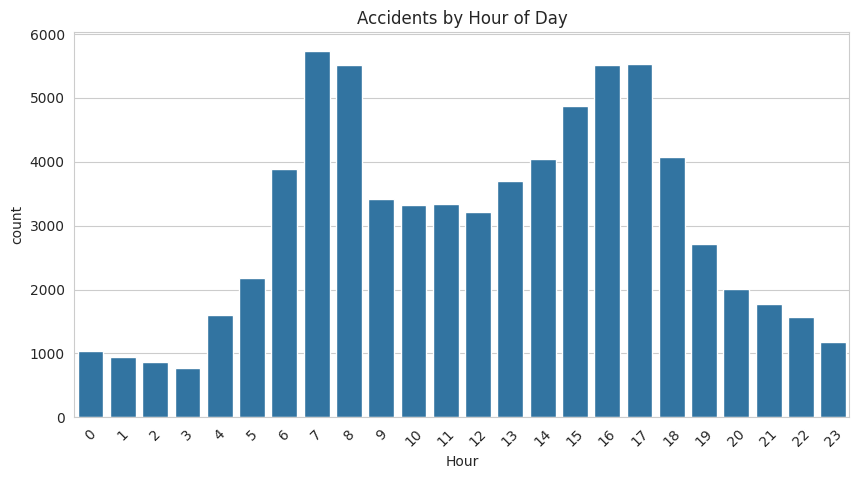

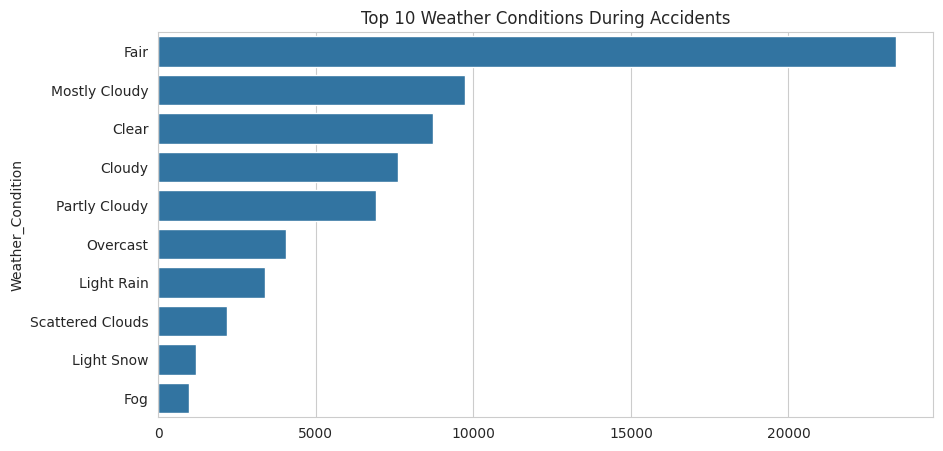

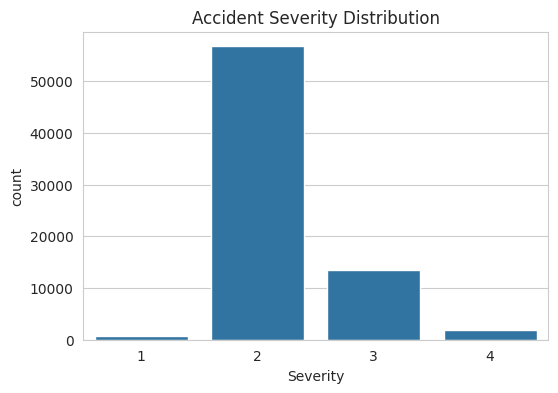

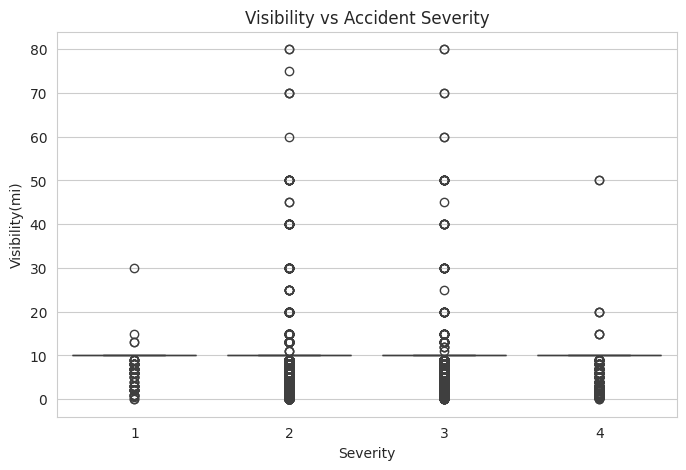

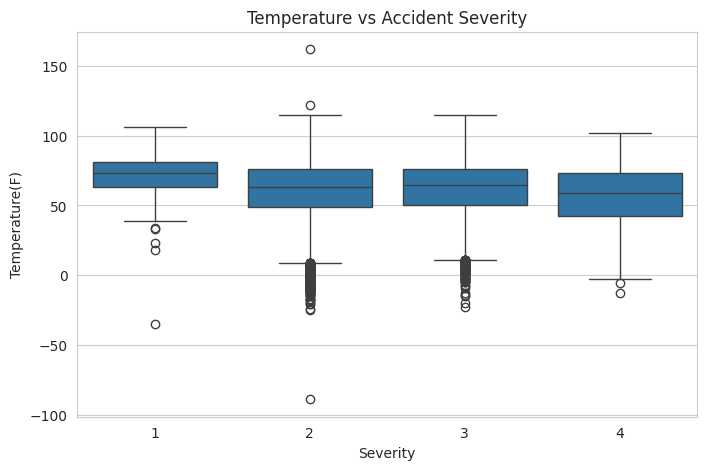

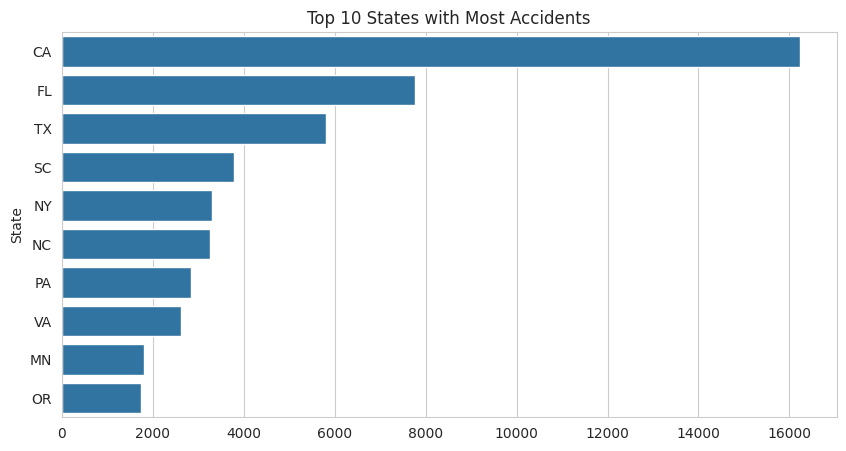

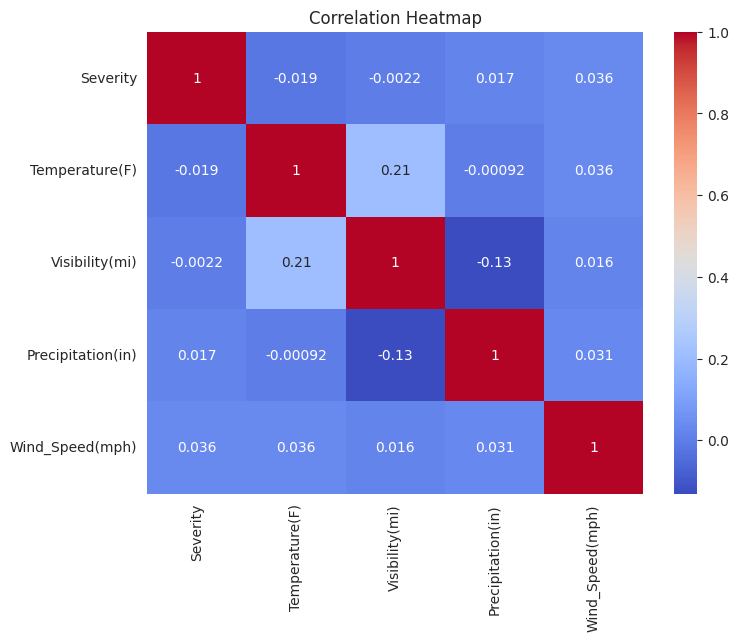

Analysis Complete.
Insights:
- Accidents peak during certain hours.
- Weather conditions influence accident frequency.
- Visibility and precipitation impact severity.
- Some states have significantly higher accident rates.
- Heatmap shows geographic accident hotspots.


In [1]:
# ==========================================================
# Task-05: US Traffic Accident Data Analysis
# Prodigy InfoTech – Data Science Internship
# Intern: Vishv Bhavsar
# Track Code: DS
# ==========================================================

# =============================
# 1. Import Libraries
# =============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

sns.set_style("whitegrid")

# =============================
# 2. Load Dataset
# =============================

df = pd.read_csv("us_accidents_sample.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# =============================
# 3. Data Cleaning
# =============================

# Convert Start_Time to datetime
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors='coerce')

# Drop missing values in important columns
df = df.dropna(subset=["Start_Time", "Weather_Condition",
                       "Start_Lat", "Start_Lng"])

# =============================
# 4. Time-Based Analysis
# =============================

df["Hour"] = df["Start_Time"].dt.hour
df["Month"] = df["Start_Time"].dt.month
df["Day"] = df["Start_Time"].dt.dayofweek

plt.figure(figsize=(10,5))
sns.countplot(x="Hour", data=df)
plt.title("Accidents by Hour of Day")
plt.xticks(rotation=45)
plt.show()

# =============================
# 5. Weather Condition Analysis
# =============================

top_weather = df["Weather_Condition"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_weather.values, y=top_weather.index)
plt.title("Top 10 Weather Conditions During Accidents")
plt.show()

# =============================
# 6. Severity Analysis
# =============================

plt.figure(figsize=(6,4))
sns.countplot(x="Severity", data=df)
plt.title("Accident Severity Distribution")
plt.show()

# =============================
# 7. Visibility vs Severity
# =============================

plt.figure(figsize=(8,5))
sns.boxplot(x="Severity", y="Visibility(mi)", data=df)
plt.title("Visibility vs Accident Severity")
plt.show()

# =============================
# 8. Temperature vs Severity
# =============================

plt.figure(figsize=(8,5))
sns.boxplot(x="Severity", y="Temperature(F)", data=df)
plt.title("Temperature vs Accident Severity")
plt.show()

# =============================
# 9. State-wise Accident Count
# =============================

top_states = df["State"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 10 States with Most Accidents")
plt.show()

# =============================
# 10. Correlation Heatmap
# =============================

numeric_cols = [
    "Severity",
    "Temperature(F)",
    "Visibility(mi)",
    "Precipitation(in)",
    "Wind_Speed(mph)"
]

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# =============================
# 11. Accident Hotspot Heatmap
# =============================

# Take subset for faster map rendering
df_map = df.sample(5000)

map_center = [df_map["Start_Lat"].mean(), df_map["Start_Lng"].mean()]

accident_map = folium.Map(location=map_center, zoom_start=5)

heat_data = list(zip(df_map["Start_Lat"], df_map["Start_Lng"]))

HeatMap(heat_data).add_to(accident_map)

accident_map

# =============================
# 12. Conclusion
# =============================

print("Analysis Complete.")
print("Insights:")
print("- Accidents peak during certain hours.")
print("- Weather conditions influence accident frequency.")
print("- Visibility and precipitation impact severity.")
print("- Some states have significantly higher accident rates.")
print("- Heatmap shows geographic accident hotspots.")